In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [11]:
original = pd.read_csv(r'C:\Users\nikhi\OneDrive\Desktop\Data Science\car_sales\cars_sampled.csv')

In [12]:
df1 = original.copy()

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

In [14]:
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
df1 = df1.drop(columns=col, axis=1)

In [15]:
df1.drop_duplicates(keep='first', inplace=True)

In [16]:
df1.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [17]:
df1 = df1[(df1['yearOfRegistration'] >= 1950) & (df1['yearOfRegistration'] <= 2018) & (df1['price'] >= 100) & (df1['price'] <= 150000) & (df1['powerPS'] >= 10) & (df1['powerPS'] <= 500)]

In [18]:
df1['monthOfRegistration']/=12

In [19]:
df1['age'] = (2018 - df1['yearOfRegistration'] + df1['monthOfRegistration'])
df1['age'] = round(df1['age'],2)

In [20]:
df1 = df1.drop(['monthOfRegistration', 'yearOfRegistration'], axis=1)

<AxesSubplot:xlabel='age', ylabel='age'>

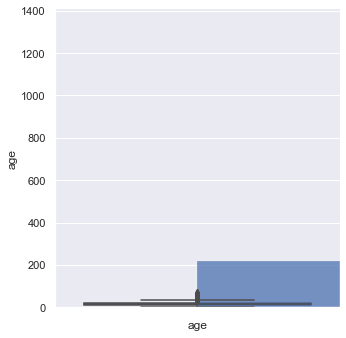

In [21]:
sns.displot(df1['age'])
sns.boxplot(y=df1['age'])

<AxesSubplot:xlabel='age', ylabel='price'>

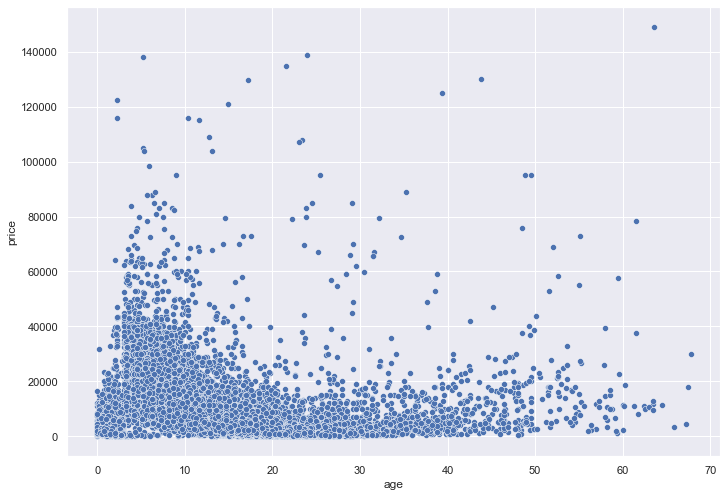

In [22]:
sns.scatterplot(x='age', y='price', data=df1)

<AxesSubplot:xlabel='age', ylabel='powerPS'>

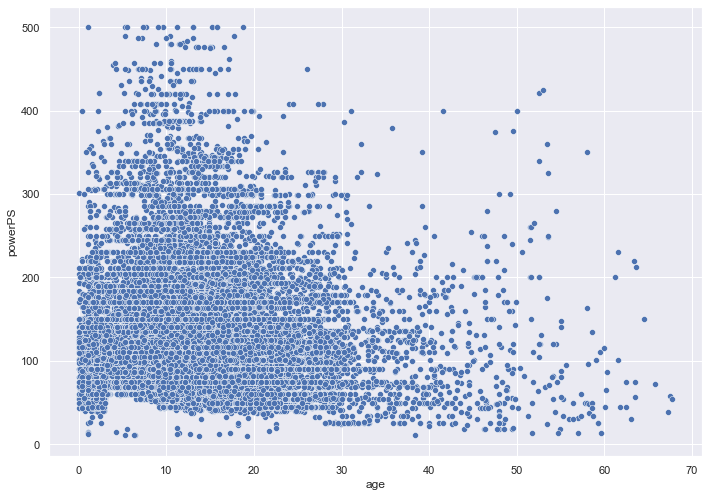

In [23]:
sns.scatterplot(x='age', y='powerPS', data=df1)

In [24]:
df1['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [25]:
df1 = df1.drop(['seller','offerType','abtest'], axis=1)

In [31]:
df1_num = df1.select_dtypes(exclude=[object])

In [34]:
df1_num.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
age         0.336
Name: price, dtype: float64